# Imports

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import glob
from scipy.special import factorial

# File reading

In [20]:
def readDotFit(path):
    f1 = open(path, "r")

    #ignore everything until [result] line
    s = f1.readline()
    while "result" not in s:
        s = f1.readline()

    #because there is a space between the [ and the first number, lines can be processed using split(" ")
    channels = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    energy1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    ydata1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    yfit1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)
    bg1 = np.array(f1.readline().split(" ")[3:-1], dtype=float)

    f1.close()

    return energy1, ydata1, yfit1, bg1, channels

In [21]:
dat = {10:   readDotFit(glob.glob("10s_report/*.fit")[0]),
       20:   readDotFit(glob.glob("20s_report/*.fit")[0]),
       30:   readDotFit(glob.glob("30s_report/*.fit")[0]),
       60:   readDotFit(glob.glob("60s_report/*.fit")[0]),
       120:  readDotFit(glob.glob("2m_report/*.fit")[0]),
       300:  readDotFit(glob.glob("5m_report/*.fit")[0]),
       600:  readDotFit(glob.glob("10m_report/*.fit")[0]),
       1200: readDotFit(glob.glob("20m_report/*.fit")[0]),
       1800: readDotFit(glob.glob("30m_report/*.fit")[0]),
       3600: readDotFit(glob.glob("60m_report/*.fit")[0])}

keys = np.array(list(dat))

# Plotting

## Raw plots of data

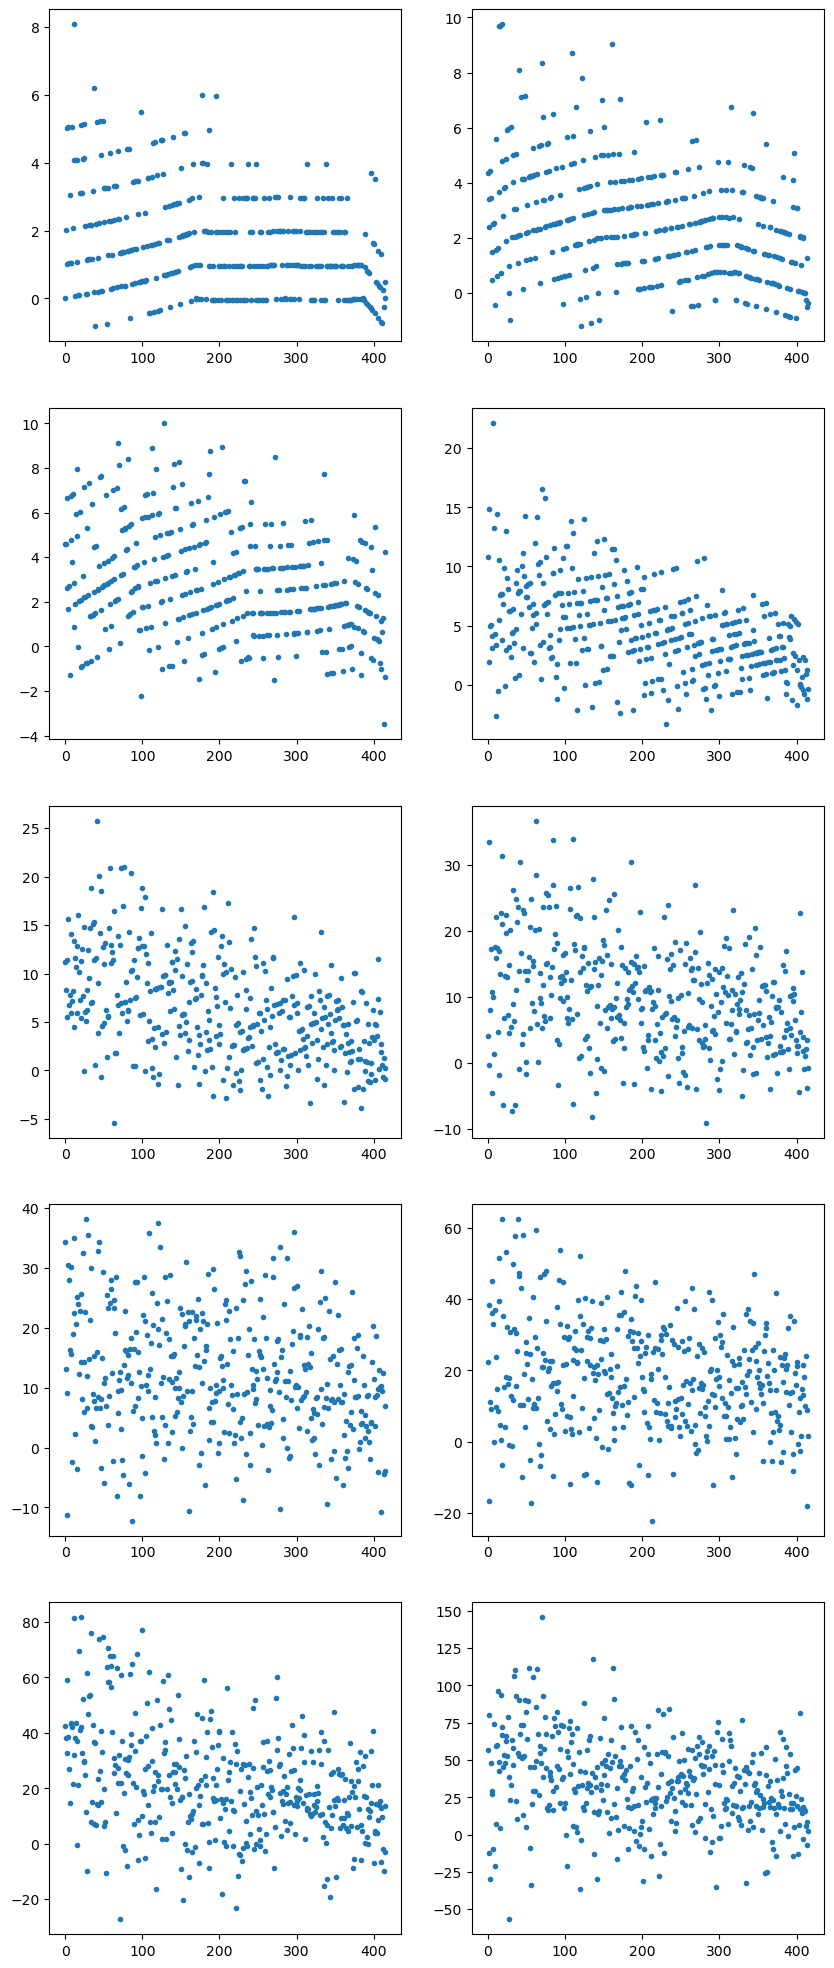

In [22]:
f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    axs[i].plot(dat[keys[i]][1][2500:3000] - dat[keys[i]][3][2500:3000], ".")

plt.show()

## Normal probability plots

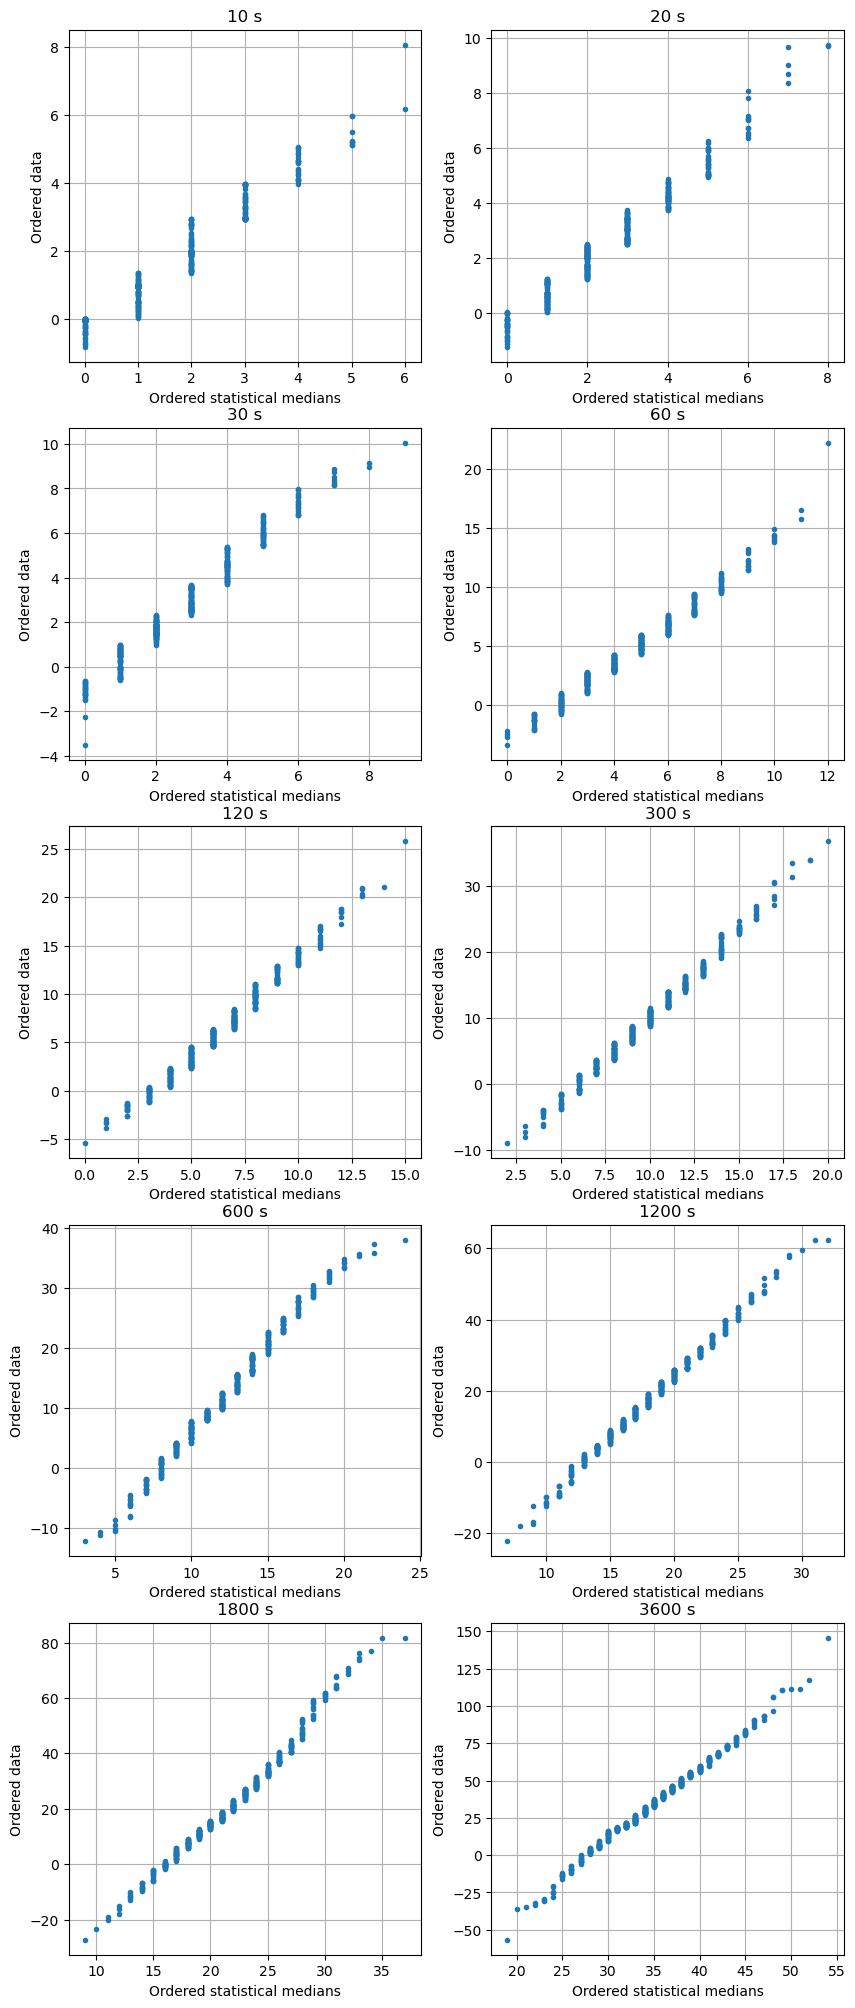

In [23]:
def probPlot(ax, dat, title):
    
    osm, osr = stats.probplot(dat, (np.average(dat)), dist=stats.poisson, fit=False)
    ax.plot(osm, osr, ".") #plot data
    #ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.ticklabel_format(scilimits=(-5,5))
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))

axs = axs.reshape(10)

for i in range(0, axs.size):
    probPlot(axs[i], dat[keys[i]][1][2500:3000] - dat[keys[i]][3][2500:3000], str(keys[i])+" s")

plt.show()

## Plot variance vs measurement time

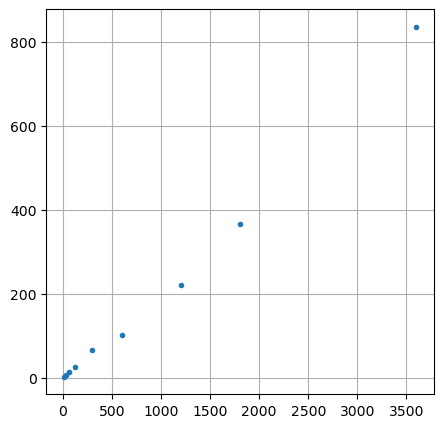

In [24]:
f, ax = plt.subplots(figsize=(5, 5))

stds=[]

for i in keys:
    stds.append(np.std(dat[i][1][2500:3000] - dat[i][3][2500:3000]))

stds = np.array(stds)

ax.plot(keys, stds**2, ".")

ax.grid(True)

plt.show()